### Sinjini Ghosh

#### Aim: To predict the percentage scored by a student based on the number of study hours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Univariate Analysis

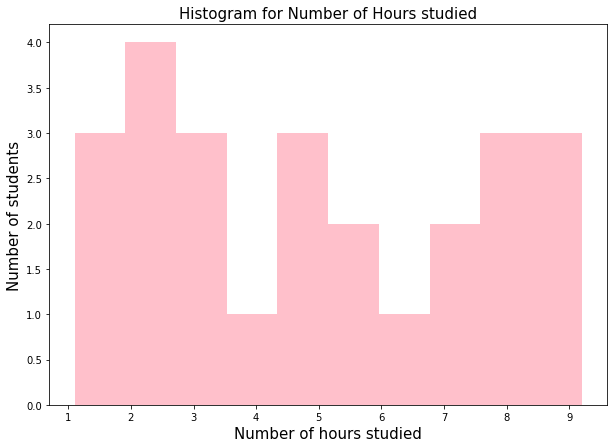

In [6]:
plt.figure(figsize=(10, 7))
plt.hist(df.Hours, bins = 10, color = "pink")
plt.xlabel("Number of hours studied", fontsize=15)
plt.ylabel("Number of students", fontsize=15)
plt.title("Histogram for Number of Hours studied", fontsize=15)
plt.show()

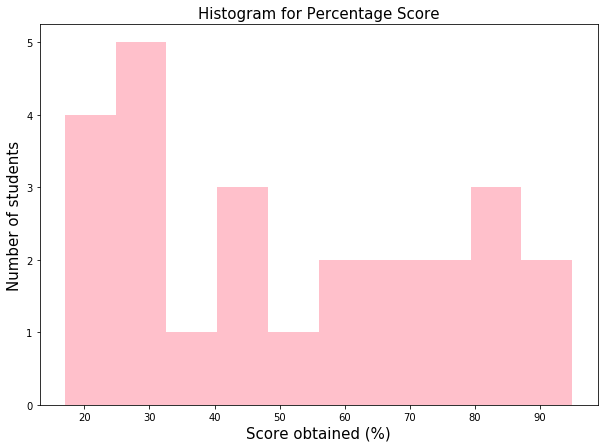

In [7]:
plt.figure(figsize = (10, 7))
plt.hist(df.Scores, bins=10, color = "pink")
plt.xlabel("Score obtained (%)", fontsize=15)
plt.ylabel("Number of students", fontsize=15)
plt.title("Histogram for Percentage Score", fontsize=15)
plt.show()


We see that in both of the histograms, the data is right skewed

### Bivariate Analysis

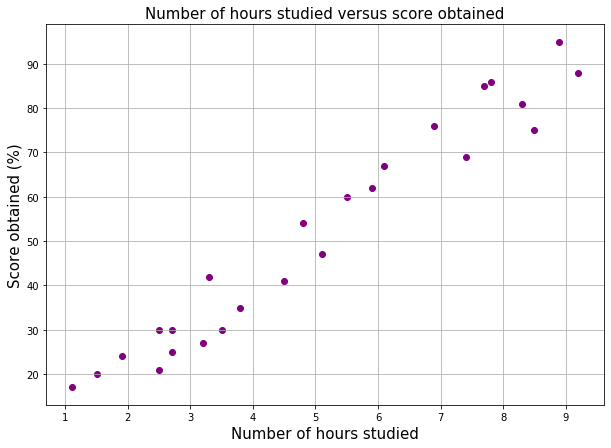

In [8]:
plt.figure(figsize = (10,7 ))
plt.scatter(df.Hours, df.Scores , color = "purple")
plt.ylabel("Score obtained (%)", fontsize=15)
plt.xlabel("Number of hours studied", fontsize=15)
plt.title("Number of hours studied versus score obtained", fontsize=15)
plt.grid()

The scatter plot between Number of study hours and Score obtained shows a linear relationship and a positive correlation between the two variables. This means that with the increase in study hours, the percentage score increases. 

In [9]:
# To find the correlation between the variables

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation value between Hours studied and Score obtained is 0.98, which shows a high positive correlation. 

In [10]:
# To check for missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the data set

### Implementing the Linear Regression model

In [11]:
x = df.Hours
y = df.Scores

# Separating the feature and the target variable



In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values.reshape(-1,1), y, test_size = 0.2, random_state = 0)

# Splitting into training and testing sets

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

lr = LinearRegression(fit_intercept = True)
lr.fit(x_train, y_train)

# Fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting the target variable values for training data

y_pred_train = lr.predict(x_train)

train_data_predictions = pd.DataFrame({"Hours": x_train.flatten(), "Actual Score": y_train, "Predicted Score": y_pred_train})

train_data_predictions

,Hours,Actual Score,Predicted Score
22,3.8,35,39.678655
17,1.9,24,20.848407
24,7.8,86,79.321281
23,6.9,76,70.401690
14,1.1,17,12.919882
1,5.1,47,52.562508
10,7.7,85,78.330215
13,3.3,42,34.723326
8,8.3,81,84.276609
6,9.2,88,93.196200


In [15]:
# Predicting the target variable values for testing data

y_pred = lr.predict(x_test)

test_data_predictions = pd.DataFrame({"Hours": x_test.flatten(), "Actual Score": y_test, "Predicted Score": y_pred})

test_data_predictions



,Hours,Actual Score,Predicted Score
5,1.5,20,16.884145
2,3.2,27,33.732261
19,7.4,69,75.357018
16,2.5,30,26.794801
11,5.9,62,60.491033


In [16]:
# R2 value

lr.score(x_test, y_test)

# R2 score helps us determine the what percentage of the variance of the dependent variable is explained by the variance in the independent variable.


0.9454906892105356

In [18]:
# Testing on new data

number_of_hours = float(input("Enter the number of hours studied: "))/
result = lr.predict(pd.Series([number_of_hours]).values.reshape(-1,1))
print("Predicted value of Score: ", result.item(), "%")

Enter the number of hours studied: 9.25
Predicted value of Score:  93.69173248737538 %


### Testing the model accuracy

In [19]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error for training data: ", mean_absolute_error(y_pred_train, y_train))
print("Mean Absolute Error for testing data: ", mean_absolute_error(y_pred, y_test))


Mean Absolute Error for training data:  5.186601709180368
Mean Absolute Error for testing data:  4.183859899002975


In [20]:
# Mean Squared Error

print("Mean Squared Error for training data: ", mean_squared_error(y_pred_train, y_train))
print("Mean Squared Error for testing data: ", mean_squared_error(y_pred, y_test))

Mean Squared Error for training data:  30.89818237731452
Mean Squared Error for testing data:  21.5987693072174


In [21]:
# Root mean squared error

from math import sqrt

print("Root Mean Squared Error for training data: ", sqrt(mean_squared_error(y_pred_train, y_train)))
print("Root Mean Squared Error for testing data: ", sqrt(mean_squared_error(y_pred, y_test)))

Root Mean Squared Error for training data:  5.558613350226342
Root Mean Squared Error for testing data:  4.6474476121003665
